<a href="https://colab.research.google.com/github/JCaballerot/Data_science_for_business/blob/main/regresion_lineal/sidney_data_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando librerías

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## Leyendo data

In [ ]:

pddf = pd.read_csv('house_price_data.csv')
pddf.head()

In [ ]:
pddf.columns.tolist()

## Analizando el target

In [ ]:
# Gráfico de distribución 
sns.displot(pddf.price, kind="kde", fill=True)

In [ ]:
pddf.shape

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf.price, orient="h")

In [16]:
# Tratamiento por z-score
upper_limit = np.mean(pddf.price) + 3*np.std(pddf.price)
lower_limit = np.mean(pddf.price) - 3*np.std(pddf.price)

pddf['price_t'] = pddf.price.apply(lambda x: upper_limit if x > upper_limit
                                        else lower_limit if x < lower_limit else x)

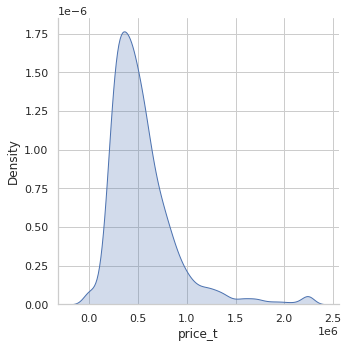

In [17]:
# Gráfico de distribución 
sns.displot(pddf.price_t, kind="kde", fill=True)

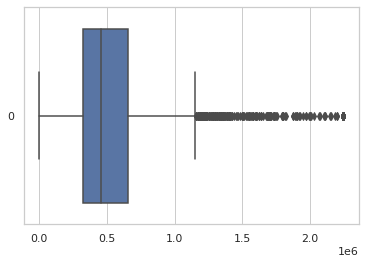

In [18]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf.price_t, orient="h")

Text(0, 0.5, 'Precio de la vivienda')

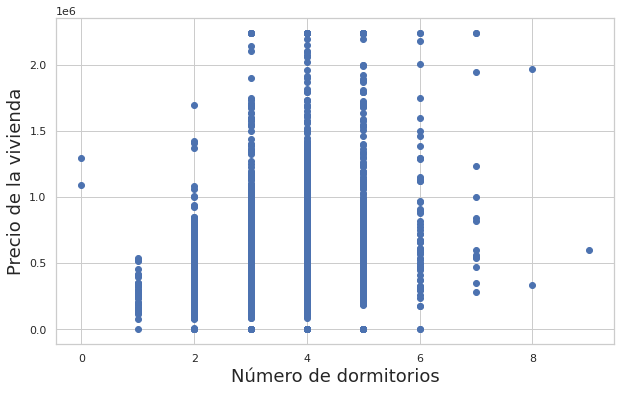

In [23]:
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(pddf.bedrooms, pddf.price_t)
plt.xlabel("Número de dormitorios", fontsize=18)
plt.ylabel("Precio de la vivienda", rotation=90, fontsize=18)

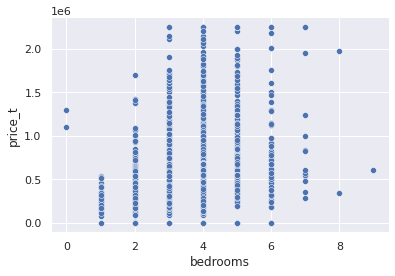

In [24]:

sns.set(rc={'figure.figsize':(6, 4)})
sns.relplot(data = pddf, x="bedrooms", y="price_t", height=4, aspect=11.7/8.27)